<a href="https://colab.research.google.com/github/JaisuryaprakashA/jaisuryascodes/blob/main/salesdata_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
How do I filter a Pandas DataFrame?

Here is all the data you need:
"sales_data_sample.csv"

## Data loading

### Subtask:
Load the "sales_data_sample.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display the first five rows.



In [7]:
import pandas as pd

sales_data = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
display(sales_data.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64
CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
                                  ...    
Royale Belge                     33440.10
Microscale Inc.                  33144.93
Auto-Moto Classics Inc.          26479.26
Atelier graphique                24179.96
Boards & Toys Co.                 9129.35
Name: SALES, Length: 92, dtype: float64
10032628.85


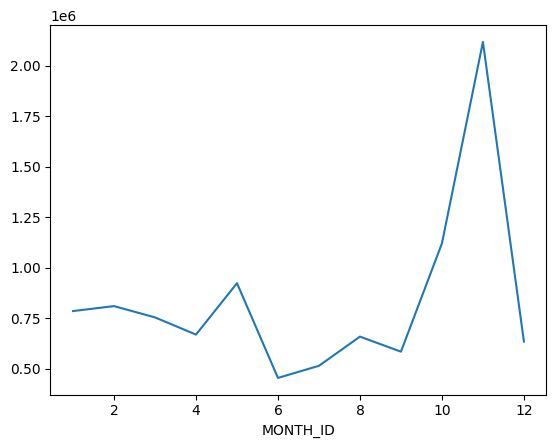

In [8]:
# Sales over time
sales_by_month = sales_data.groupby('MONTH_ID')['SALES'].sum()
sales_by_month.plot(kind='line')

# Top-selling products
top_products = sales_data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print(top_products)

# Best customers
best_customers = sales_data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False)
print(best_customers)

# Overall performance
total_sales = sales_data['SALES'].sum()
print(total_sales)

## Data exploration

### Subtask:
Explore the loaded sales data to understand its structure and identify columns relevant for filtering demonstrations.


**Reasoning**:
Display the shape, data types, missing values, and value distributions of relevant columns to understand the data structure and identify suitable columns for filtering demonstrations.



In [3]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", sales_data.shape)

# Display data types of each column
print("\nData Types of each column:\n", sales_data.dtypes)

# Check for missing values
print("\nMissing values per column:\n", sales_data.isnull().sum())

# Identify candidate columns for filtering and analyze their value distributions
candidate_columns = ['COUNTRY', 'PRODUCTLINE', 'STATUS', 'ORDERNUMBER', 'SALES', 'QUANTITYORDERED', 'YEAR_ID', 'DEALSIZE']

for col in candidate_columns:
    print(f"\nColumn: {col}")
    print("Unique values:", sales_data[col].unique())
    print("Value counts:\n", sales_data[col].value_counts())

# Summarize findings
print("\nSummary:")
print("The 'sales_data' DataFrame has", sales_data.shape[0], "rows and", sales_data.shape[1], "columns.")
print("The following columns are suitable for filtering demonstrations:", ', '.join(candidate_columns))

Shape of the DataFrame: (2823, 25)

Data Types of each column:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Missing values per column:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID            

## Data wrangling

### Subtask:
Demonstrate various filtering techniques on the sales data.


**Reasoning**:
Apply the filtering techniques as described in the instructions, creating new dataframes for each filter and displaying the head and shape of each.



In [4]:
# 1. Single Column Filter
filtered_order_number = sales_data[sales_data['ORDERNUMBER'] > 10100]
display(filtered_order_number.head())
print(filtered_order_number.shape)

# 2. Multiple Conditions Filter
filtered_usa_shipped = sales_data[(sales_data['COUNTRY'] == 'USA') & (sales_data['STATUS'] == 'Shipped')]
display(filtered_usa_shipped.head())
print(filtered_usa_shipped.shape)

# 3. Logical Operators Filter
filtered_productline_sales = sales_data[((sales_data['PRODUCTLINE'] == 'Trains') | (sales_data['PRODUCTLINE'] == 'Motorcycles')) & (sales_data['SALES'] > 5000)]
display(filtered_productline_sales.head())
print(filtered_productline_sales.shape)

# 4. String Methods Filter
filtered_productline_contains = sales_data[sales_data['PRODUCTLINE'].str.contains('Trains', na=False)]
display(filtered_productline_contains.head())
print(filtered_productline_contains.shape)

# 5. isin() Filter
countries = ['USA', 'France', 'UK']
filtered_isin_countries = sales_data[sales_data['COUNTRY'].isin(countries)]
display(filtered_isin_countries.head())
print(filtered_isin_countries.shape)

# 6. between() Filter
filtered_sales_between = sales_data[sales_data['SALES'].between(1000, 5000)]
display(filtered_sales_between.head())
print(filtered_sales_between.shape)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


(2819, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small


(935, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
4,10159,49,100.0,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
7,10188,48,100.0,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
20,10341,41,100.0,9,7737.93,11/24/2004 0:00,Shipped,4,11,2004,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Large
25,10417,66,100.0,2,7516.08,5/13/2005 0:00,Disputed,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
57,10145,37,100.0,9,5192.95,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium


(70, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1065,10105,38,100.00,13,4330.10,2/11/2003 0:00,Shipped,1,2,2003,...,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Medium
1066,10117,21,95.80,7,2011.80,4/16/2003 0:00,Shipped,2,4,2003,...,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",NaN,Singapore,NaN,79903,Singapore,Japan,Natividad,Eric,Small
1067,10128,41,100.00,4,4837.18,6/6/2003 0:00,Shipped,2,6,2003,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
1068,10142,22,97.81,10,2151.82,8/8/2003 0:00,Shipped,3,8,2003,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Small
1069,10153,29,88.74,9,2573.46,9/28/2003 0:00,Shipped,3,9,2003,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small


(77, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


(1462, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium


(2224, 25)


## Data visualization

### Subtask:
Visualize the filtered datasets generated in the previous step to illustrate the effects of different filtering operations.


**Reasoning**:
Visualize the filtered datasets using appropriate plot types.



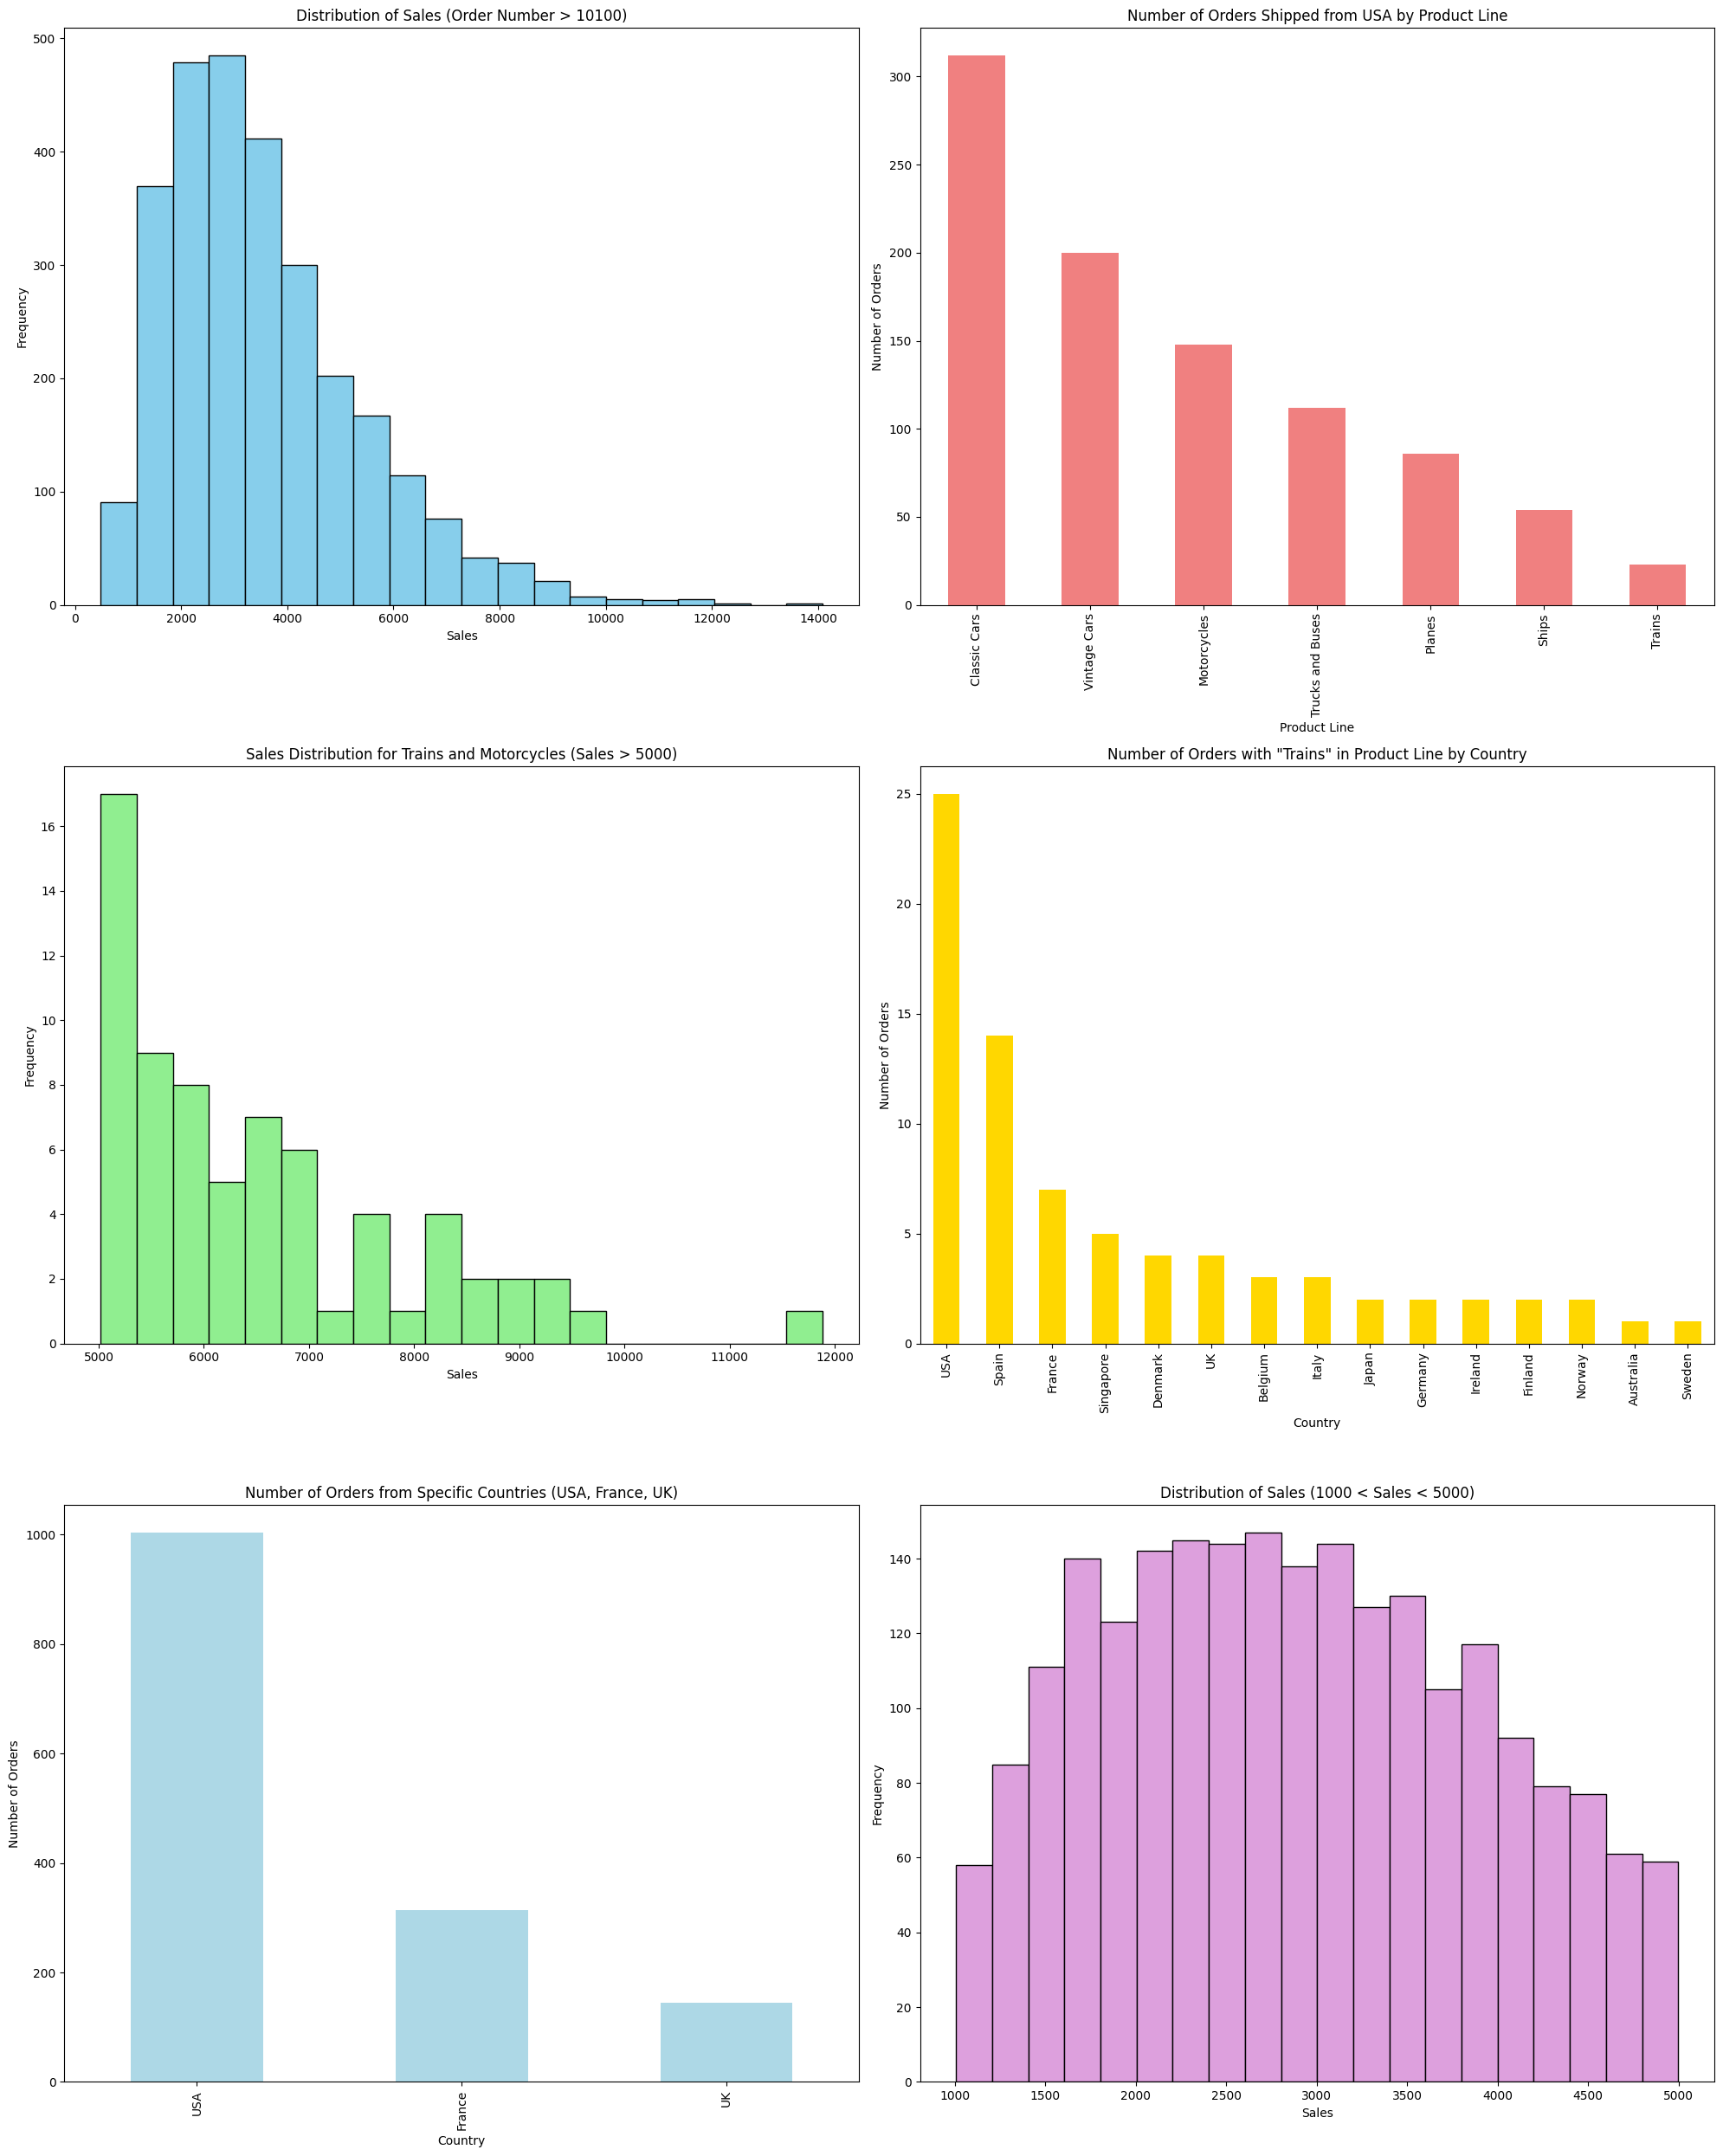

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

# Visualize filtered_order_number (e.g., distribution of sales)
plt.subplot(3, 2, 1)
plt.hist(filtered_order_number['SALES'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales (Order Number > 10100)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Visualize filtered_usa_shipped (e.g., sales by product line)
plt.subplot(3, 2, 2)
filtered_usa_shipped['PRODUCTLINE'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Number of Orders Shipped from USA by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Number of Orders')

# Visualize filtered_productline_sales (e.g., sales distribution)
plt.subplot(3, 2, 3)
plt.hist(filtered_productline_sales['SALES'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Sales Distribution for Trains and Motorcycles (Sales > 5000)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Visualize filtered_productline_contains (e.g., sales by country)
plt.subplot(3, 2, 4)
filtered_productline_contains['COUNTRY'].value_counts().plot(kind='bar', color='gold')
plt.title('Number of Orders with "Trains" in Product Line by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

# Visualize filtered_isin_countries (e.g., sales by country)
plt.subplot(3, 2, 5)
filtered_isin_countries['COUNTRY'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Number of Orders from Specific Countries (USA, France, UK)')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

# Visualize filtered_sales_between (e.g., distribution of sales)
plt.subplot(3, 2, 6)
plt.hist(filtered_sales_between['SALES'], bins=20, color='plum', edgecolor='black')
plt.title('Distribution of Sales (1000 < Sales < 5000)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Summary:

### Q&A

How do I filter a Pandas DataFrame?

The provided solution demonstrates several methods for filtering a Pandas DataFrame, including:

*   **Single column filter:** Filtering based on a single column's values (e.g., `ORDERNUMBER` > 10100).
*   **Multiple conditions filter:** Combining multiple filtering criteria using logical operators (e.g., `COUNTRY` == 'USA' and `STATUS` == 'Shipped').
*   **Logical operators filter:** Using logical operators (`|` for OR, `&` for AND) to combine multiple conditions (e.g., `PRODUCTLINE` is 'Trains' or 'Motorcycles' and `SALES` > 5000).
*   **String methods filter:**  Filtering based on string operations, like checking for substrings (e.g., `PRODUCTLINE` containing 'Trains').
*   **`isin()` filter:** Filtering based on whether a column value exists in a specified list (e.g., `COUNTRY` in ['USA', 'France', 'UK']).
*   **`between()` filter:** Filtering for values within a specified range (e.g., `SALES` between 1000 and 5000).


### Data Analysis Key Findings

*   The `sales_data_sample.csv` file required `latin-1` encoding for successful loading due to character encoding issues.
*   The dataset contains 2823 rows and 25 columns, with missing values in several columns including "ADDRESSLINE2", "STATE", "TERRITORY", and "POSTALCODE".
*   Several filtering methods were demonstrated, creating new dataframes for each specific filter.  Filtering examples included selecting orders above a certain number (`ORDERNUMBER` > 10100), filtering by multiple criteria (e.g. country and status), filtering by string matching (`PRODUCTLINE`.str.contains('Trains')), and filtering by numerical ranges (`SALES`.between(1000, 5000)).
*   The visualizations of the filtered data provided insights into the impact of each filter, revealing distributions of sales, product line popularity by country, and the number of orders from specific countries.

### Insights or Next Steps

*   Address missing values: Investigate the reasons for missing data in columns like "ADDRESSLINE2", "STATE", "TERRITORY", and "POSTALCODE". Decide whether to impute, remove rows with missing data, or consider the implications of the missing data in further analysis.
*   Explore more complex filters:  Combine multiple filtering criteria with different techniques and explore more advanced data manipulation features for deeper insights.
